<a href="https://colab.research.google.com/github/sa23612/CE880_Lab_coursework/blob/main/Week9/Excercise_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Welcome to CE880: An Approachable Introduction to Data Science
## Explainable AI

Load Libraries

In [1]:
import pandas as pd
import numpy as np
!git clone https://github.com/sagihaider/Basic_ML_datasets

Cloning into 'Basic_ML_datasets'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 51 (delta 9), reused 0 (delta 0), pack-reused 27
Receiving objects: 100% (51/51), 305.79 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Load Train.csv as Pandas Data Frame

In [2]:
train_data = pd.read_csv("/content/Basic_ML_datasets/Titanic_Kaggle/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Covert Sex (String data) to Categorical (Numeric data)

In [3]:
train_data['Sex_code'] = 1*(train_data['Sex']=='female')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_code     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Select the relevant features

In [5]:
target_name = 'Survived'
feature_list = ['Pclass', 'Sex_code', 'Age', 'Fare']

Select a Model

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
X, y = train_data[feature_list], train_data[target_name]
# X, y = ###, ####
pred_model = XGBRegressor()
pred_model.fit(X, y)
y_pred = pred_model.predict(X)
error=mean_squared_error(y,y_pred)
print(error)

0.016942420743587625


Install SHAP

In [7]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.0 MB/s eta 0:00:00


Calculate Shaply values

[21:01:09] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


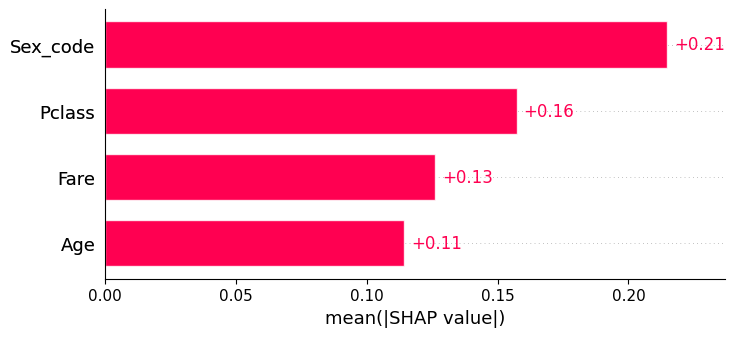

In [8]:
import shap
explainer = shap.Explainer(pred_model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values )